Dataset Characteristics:
File Type: csv
Dimensions: (21613, 21)

Data Types:
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

First few rows of the dataset:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0

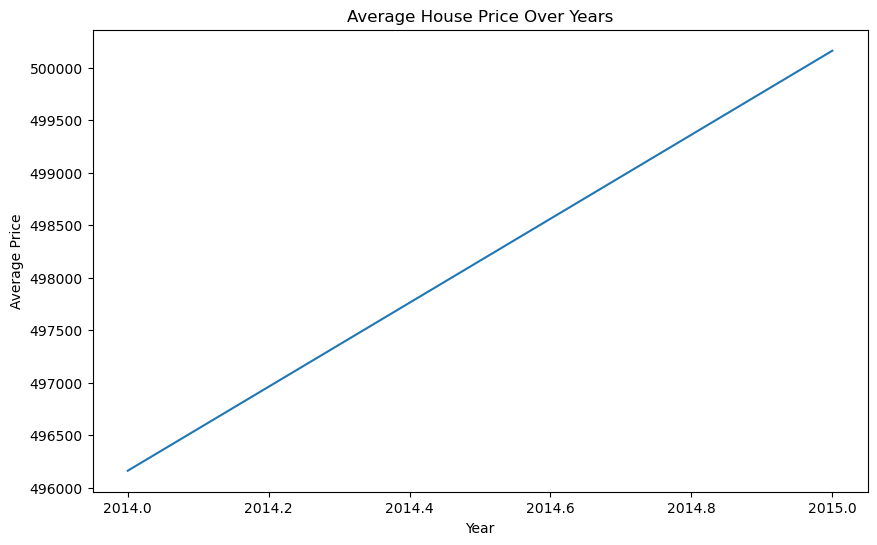


First few rows of the transformed dataset:
           id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13   221900.0       3.0        1.0       1180.0   
2  5631500400 2015-02-25   180000.0       2.0        1.0        770.0   
3  2487200875 2014-12-09   604000.0       4.0        3.0       1960.0   
4  1954400510 2015-02-18   510000.0       3.0        2.0       1680.0   
5  7237550310 2014-05-12  1225000.0       4.0        4.5       5420.0   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0    5650.0     1.0           0     0  ...      1955             0    98178   
2   10000.0     1.0           0     0  ...      1933             0    98028   
3    5000.0     1.0           0     0  ...      1965             0    98136   
4    8080.0     1.0           0     0  ...      1987             0    98074   
5   18298.5     1.0           0     0  ...      2001             0    98053   

       lat     long  sqft_living15  sqft_l

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Importing the Dataset
file_path = r"C:\Users\User\OneDrive\Desktop\New folder (2)\Dataset 2 (House Sales) (2)\house_sales.csv"
house_sales = pd.read_csv(file_path)

# Display the dataset characteristics
print("Dataset Characteristics:")
print(f"File Type: {file_path.split('.')[-1]}")
print(f"Dimensions: {house_sales.shape}")
print("\nData Types:")
print(house_sales.dtypes)
print("\nFirst few rows of the dataset:")
print(house_sales.head())

# Step 2: Cleaning and Handling Missing Data
# Fill missing values with the median
house_sales['bedrooms'] = house_sales['bedrooms'].fillna(house_sales['bedrooms'].median())
house_sales['bathrooms'] = house_sales['bathrooms'].fillna(house_sales['bathrooms'].median())
house_sales['sqft_living'] = house_sales['sqft_living'].fillna(house_sales['sqft_living'].median())
house_sales['sqft_lot'] = house_sales['sqft_lot'].fillna(house_sales['sqft_lot'].median())

# Step 3: Feature Engineering - Adding New Features
# Calculate Bathroom to Bedroom Ratio
house_sales['bath_bed_ratio'] = house_sales['bathrooms'] / house_sales['bedrooms']

# Handle NaN values by removing rows where bath_bed_ratio is NaN
house_sales = house_sales.dropna(subset=['bath_bed_ratio'])

# Dimensions after handling missing values
print(f"\nDimensions after handling missing values: {house_sales.shape}")

# Convert 'date' column to datetime type
house_sales['date'] = pd.to_datetime(house_sales['date'], format='%Y%m%dT%H%M%S')

# Calculate Price per Square Foot
house_sales['price_per_sqft'] = house_sales['price'] / house_sales['sqft_living']

# Handle inf values in bath_bed_ratio by replacing them with 0
house_sales['bath_bed_ratio'] = house_sales['bath_bed_ratio'].replace([float('inf'), float('-inf')], 0)

# Step 4: Remove duplicate rows
house_sales = house_sales.drop_duplicates()

# Dimensions after removing duplicate rows
print(f"\nDimensions after removing duplicate rows: {house_sales.shape}")

# Step 5: Handle Outliers
# Cap outliers for 'sqft_lot' and 'sqft_lot15'
q1_sqft_lot = house_sales['sqft_lot'].quantile(0.25)
q3_sqft_lot = house_sales['sqft_lot'].quantile(0.75)
iqr_sqft_lot = q3_sqft_lot - q1_sqft_lot
lower_bound_sqft_lot = q1_sqft_lot - 1.5 * iqr_sqft_lot
upper_bound_sqft_lot = q3_sqft_lot + 1.5 * iqr_sqft_lot
house_sales['sqft_lot'] = house_sales['sqft_lot'].clip(lower_bound_sqft_lot, upper_bound_sqft_lot)

q1_sqft_lot15 = house_sales['sqft_lot15'].quantile(0.25)
q3_sqft_lot15 = house_sales['sqft_lot15'].quantile(0.75)
iqr_sqft_lot15 = q3_sqft_lot15 - q1_sqft_lot15
lower_bound_sqft_lot15 = q1_sqft_lot15 - 1.5 * iqr_sqft_lot15
upper_bound_sqft_lot15 = q3_sqft_lot15 + 1.5 * iqr_sqft_lot15
house_sales['sqft_lot15'] = house_sales['sqft_lot15'].clip(lower_bound_sqft_lot15, upper_bound_sqft_lot15)

# Removing extreme outliers for other numeric columns
numeric_columns = ['price', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15']
for column in numeric_columns:
    q1 = house_sales[column].quantile(0.25)
    q3 = house_sales[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    house_sales = house_sales[(house_sales[column] >= lower_bound) & (house_sales[column] <= upper_bound)]

# Step 6: Extract year from date
house_sales['year'] = house_sales['date'].dt.year

# Calculate average price per year
average_price_per_year = house_sales.groupby('year')['price'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
average_price_per_year.plot()
plt.title('Average House Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

# Display the first few rows of the transformed dataset to verify the new columns
print("\nFirst few rows of the transformed dataset:")
print(house_sales.head())

# Step 7: Save the Transformed Dataset
transformed_file_path = r"C:\Users\User\OneDrive\Desktop\New folder (2)\Dataset 2 (House Sales) (2)\transformed_house_sales2.csv"
house_sales.to_csv(transformed_file_path, index=False)

print("Transformed dataset saved at:", transformed_file_path)
